In [1]:
# Load the extension and set it to autoreload all modules.
%load_ext autoreload
%autoreload 2

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [3]:
from general.spectrogram import SpectrogramLoader
from general.keras import Trainer
from pcgita.dataloader import PcGitaDataLoader
from pcgita.preprocessor import PcGitaPreprocessor
from pcgita.model import PcGitaModel

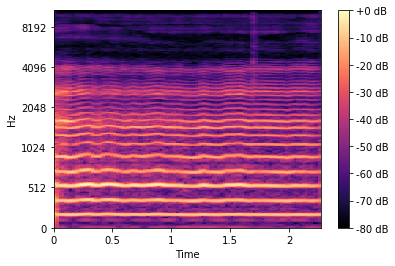

In [4]:
spectrogram_loader = SpectrogramLoader()

S = spectrogram_loader.load_spectrogram('../../k_fold_by_vowels/A/k_0/test/0/0004/AVPEPUDEAC0004a2.wav')
librosa.display.specshow(S, sr=spectrogram_loader.config["sr"], hop_length=spectrogram_loader.config["hop_length"], x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [25]:
def visualize_spectrogram(S):
    librosa.display.specshow(S, sr=spectrogram_loader.config["sr"], hop_length=spectrogram_loader.config["hop_length"], x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');

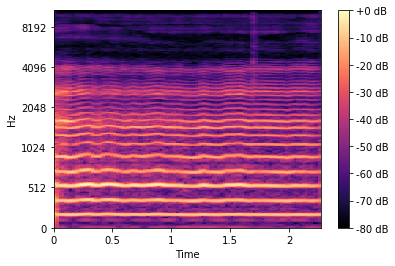

In [32]:
S = spectrogram_loader.load_spectrogram('../../k_fold_by_vowels/A/k_0/test/0/0004/AVPEPUDEAC0004a2.wav')
visualize_spectrogram(S)

In [93]:
from general.keras import prepare_session
prepare_session()

data_loader = PcGitaDataLoader(spectrogram_loader)
preprocessor = PcGitaPreprocessor()
trainer = Trainer(PcGitaModel(model='vgg'))

histories = []

for i in range(2):
    di = data_loader.load_fold('A', i)
    
    print('Fold {} loaded!'.format(i))
    #print('Train subjects: {} Test subjects: {}'.format(len(fold.X_train), len(fold.X_val)))
    #print('X_train.shape {}'.format(fold.X_train[0][0].shape))
    
    preprocessor.preprocess(di)

    print('Preprocessing: done!')
    #print('Train subjects: {} Test subjects: {}'.format(len(fold.X_train), len(fold.X_val)))

    #print('X_train.shape {}'.format(fold.X_train.shape))
    
    history = trainer.fit_model(di, early_stop=True)
    histories.append(history)
    print('Model fit: done!')

Fold 0 loaded!
Preprocessing: done!
Train on 234 samples, validate on 60 samples
Epoch 1/50
234/234 [==============================] - 9s 39ms/sample - loss: 0.7394 - acc: 0.4145 - val_loss: 0.6882 - val_acc: 0.6167
Epoch 2/50
234/234 [==============================] - 1s 3ms/sample - loss: 0.6948 - acc: 0.5385 - val_loss: 0.6868 - val_acc: 0.5333
Epoch 3/50
234/234 [==============================] - 1s 3ms/sample - loss: 0.6827 - acc: 0.5769 - val_loss: 0.6855 - val_acc: 0.6167
Epoch 4/50
234/234 [==============================] - 0s 1ms/sample - loss: 0.6820 - acc: 0.5812 - val_loss: 0.6868 - val_acc: 0.5333
Epoch 5/50
234/234 [==============================] - 1s 3ms/sample - loss: 0.6675 - acc: 0.5983 - val_loss: 0.6836 - val_acc: 0.5833
Epoch 6/50
234/234 [==============================] - 1s 3ms/sample - loss: 0.6745 - acc: 0.5427 - val_loss: 0.6835 - val_acc: 0.6167
Epoch 7/50
234/234 [==============================] - 0s 1ms/sample - loss: 0.6590 - acc: 0.6111 - val_loss: 0.684

234/234 [==============================] - 0s 1ms/sample - loss: 0.6822 - acc: 0.5470 - val_loss: 0.6857 - val_acc: 0.5500
Epoch 11/50
234/234 [==============================] - 0s 1ms/sample - loss: 0.6988 - acc: 0.5427 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 12/50
234/234 [==============================] - 1s 3ms/sample - loss: 0.6644 - acc: 0.5598 - val_loss: 0.6761 - val_acc: 0.5833
Epoch 13/50
234/234 [==============================] - 0s 1ms/sample - loss: 0.6615 - acc: 0.5556 - val_loss: 0.6808 - val_acc: 0.4833
Epoch 14/50
234/234 [==============================] - 1s 3ms/sample - loss: 0.6718 - acc: 0.5513 - val_loss: 0.6746 - val_acc: 0.5500
Epoch 15/50
234/234 [==============================] - 0s 1ms/sample - loss: 0.6634 - acc: 0.5256 - val_loss: 0.6811 - val_acc: 0.5500
Epoch 16/50
234/234 [==============================] - 1s 3ms/sample - loss: 0.6680 - acc: 0.5171 - val_loss: 0.6650 - val_acc: 0.5500
Epoch 17/50
234/234 [==============================] - 0s 1ms/sampl

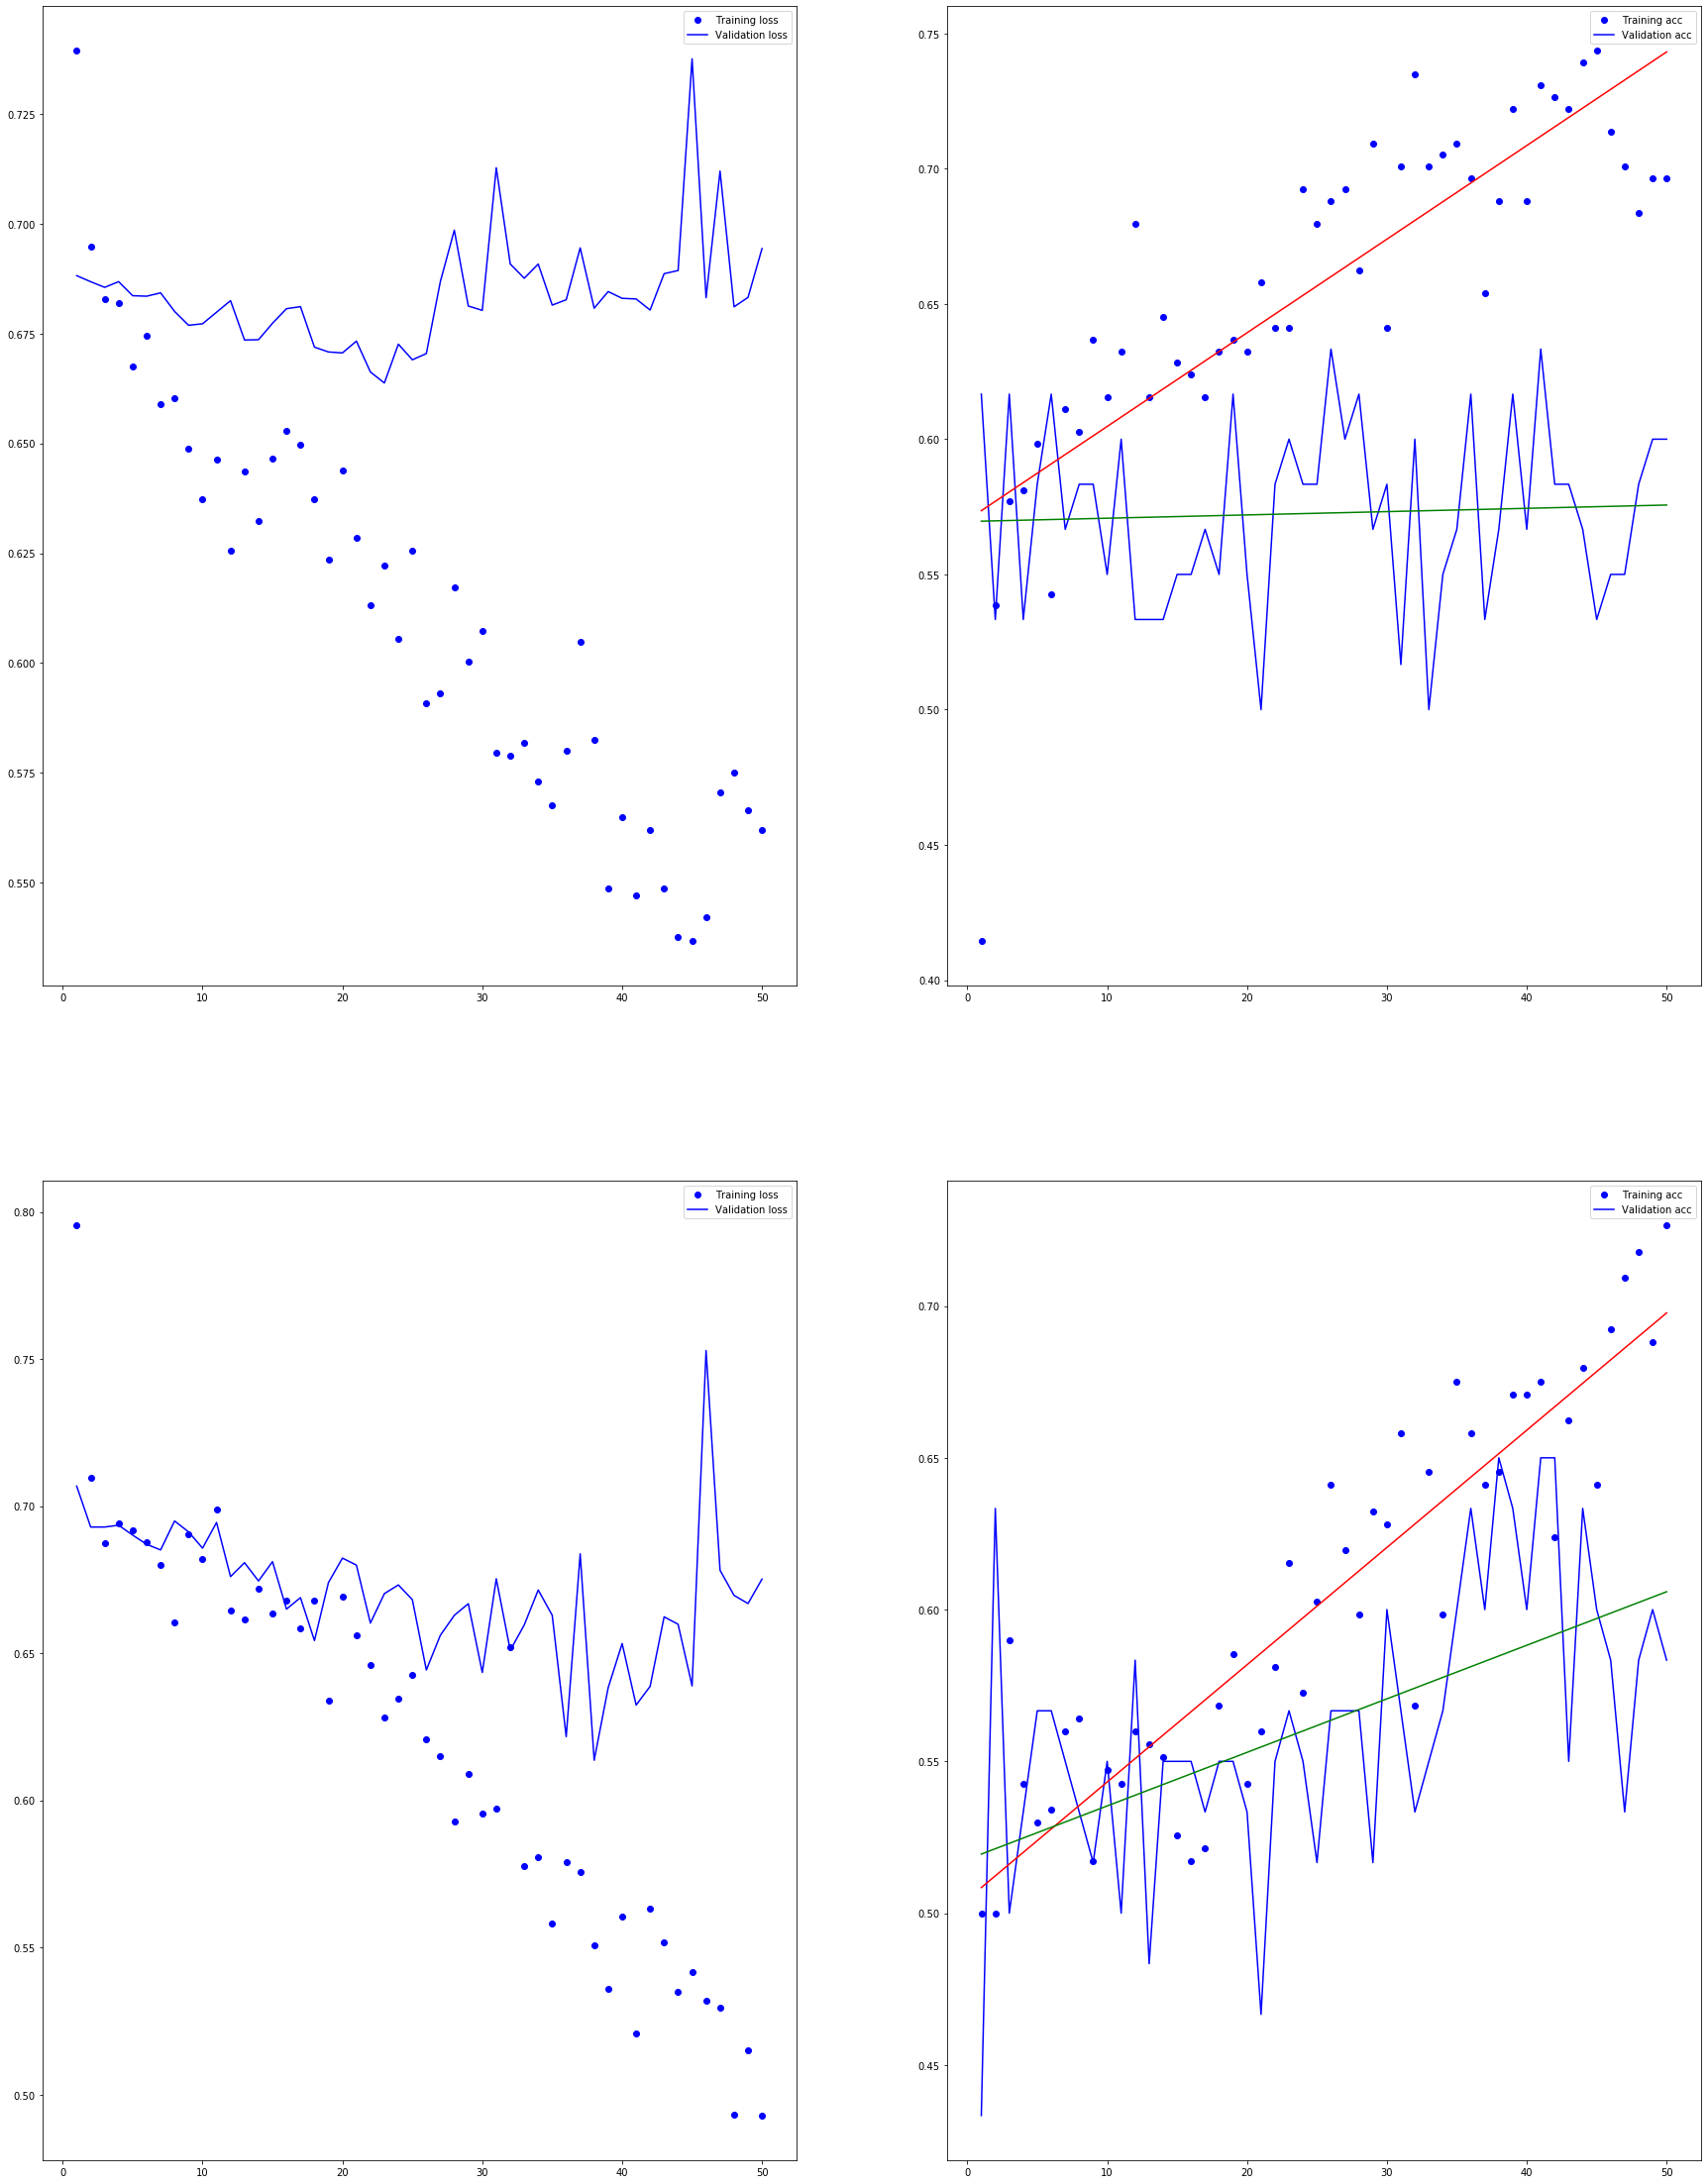

In [94]:
from general.visualization import visualize_history

fig, axs = plt.subplots(nrows=len(histories),ncols=2, figsize=(30, 40))
for i in range(len(histories)):
    visualize_history(fig, axs, i, histories[i])